In [33]:
import torchvision
from torchvision import models
import pickle
import numpy
import tensorflow as tf
import torch
from tqdm import tqdm_notebook as tqdm
from torchvision import transforms
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [11]:
train_data = pickle.load( open( "./data/Q2/train_CIFAR.pickle", "rb" ) )
num_images = len(train_data['X'])
test_data = pickle.load( open( "./data/Q2/test_CIFAR.pickle", "rb" ) )

In [12]:
alexnet_model = models.alexnet(pretrained = True)

In [20]:
feature_array = [0]*num_images
for i in range(len(train_data['X'])):
    feature_array[i] = numpy.reshape(train_data['X'][i], (32, 32, 3))

In [22]:
for i in range(len(feature_array)):
    img = transforms.ToPILImage()(feature_array[i])
    feature_array[i] = transforms.Resize((224, 224))(img)

In [23]:
pickle_out = open("resized_train_images.pickle","wb")
pickle.dump(feature_array, pickle_out)
pickle_out.close()

In [24]:
# feature_array = numpy.array(feature_array)
tensor_array = []
for i in tqdm(range(len(feature_array))):
    tensor_array.append(transforms.ToTensor()(feature_array[i]))

In [68]:
test_feature_array = [0]*num_images
for i in tqdm(range(len(test_data['X']))):
    test_feature_array[i] = numpy.reshape(test_data['X'][i], (32, 32, 3))
    img = transforms.ToPILImage()(test_feature_array[i])
    test_feature_array[i] = transforms.Resize((224, 224))(img)
    test_feature_array[i] = transforms.ToTensor()(test_feature_array[i])

In [69]:
pickle_out = open("test_fc8_features.pickle","wb")

In [71]:
# fc8_features = []
for i in tqdm(range(len(test_data['X']))):
    unsque = test_feature_array[i].unsqueeze(0)
    pickle.dump(alexnet_model(unsque), pickle_out)
#     fc8_features.append(alexnet_model(tesnor_array[i]))
pickle_out.close()

In [74]:
pickle_out.close()

In [19]:
test_file = open("test_fc8_features.pickle", 'rb')
test_fc8_features = []
for i in tqdm(range(len(test_data['X']))):
    val = pickle.load(test_file).detach().numpy()
    test_fc8_features.append(numpy.reshape(val, (1000)))
test_file.close()

In [33]:
pickle_out = open("fc8_features_new.pickle","wb")

In [58]:
pickle_out = open("features_new.pickle","wb")

In [34]:
# fc8_features = []
for i in tqdm(range(num_images)):
    unsque = tensor_array[i].unsqueeze(0)
    pickle.dump(alexnet_model(unsque), pickle_out)
#     fc8_features.append(alexnet_model(tesnor_array[i]))

In [37]:
pickle_out.close()

In [13]:
file = open("fc8_features_new.pickle", 'rb')
fc8_features = []
for i in tqdm(range(num_images)):
    val = pickle.load(file).detach().numpy()
    fc8_features.append(numpy.reshape(val, (1000)))
file.close()

In [21]:
classifier = svm.SVC(kernel = 'linear', C = 0.0001)
classifier.fit(fc8_features, train_data['Y'])

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
C_dict = {'C' : [1000, 100, 10, 2, 1, 0.1, 0.01, 0.001 0.005]}        
classifier = GridSearchCV(svm.SVC(kernel = 'linear'), C_dict)
classifier.fit(fc8_features, train_data['Y'])

In [37]:
predictions = classifier.predict(test_fc8_features)
print(accuracy_score(predictions, test_data['Y']))

0.865


In [24]:
pickle_out = open("classifier_87per","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()

In [30]:
print(make_confusion_matrix(test_data['Y'], predictions, 2))

[[825. 175.]
 [ 95. 905.]]


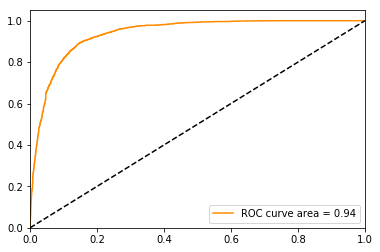

In [35]:
plot_roc_curve(fc8_features, train_data['Y'], classifier)

In [29]:
def make_confusion_matrix(y_test, y_predicted, num_classes):
    confusion_matrix = numpy.zeros(shape = (num_classes, num_classes))
    for i in range(len(y_test)):
        confusion_matrix[y_test[i], y_predicted[i]] += 1

    return confusion_matrix

In [31]:
def plot_roc_curve(x_test, y_true, classifier):
    fpr = dict()
    tpr = dict()
    y_score = classifier.decision_function(x_test)
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    area_under_curve = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve area = %0.2f' %area_under_curve)
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.legend()
    plt.show()
#Roc curve and confusion matrix codes taken directly from last assignment(A2) code